<ipython-input-8-489e1aae54de>:32: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches.append(Polygon(array(shape), True) )


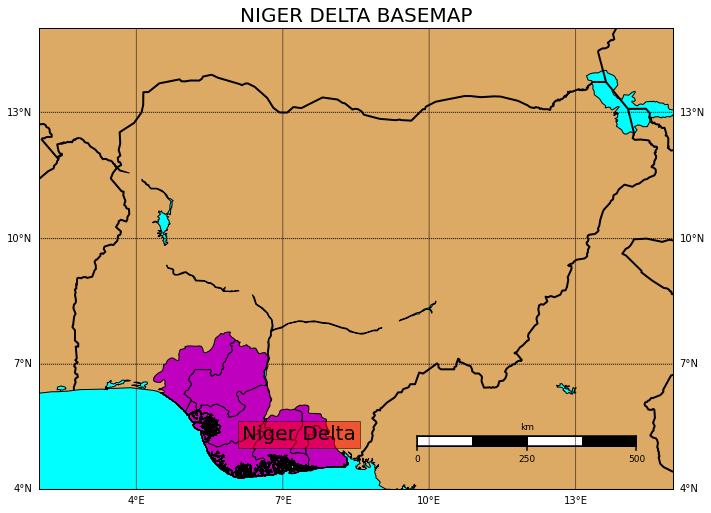

In [8]:
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon, PathPatch
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from numpy import arange, array

plt.rcParams['figure.figsize'] = (10, 11) #setting default figure size 
m = Basemap(2, 4, 15, 15, projection='gall', lat_0=15., lon_0=4, resolution='i')

fig= plt.figure()
ax= fig.add_subplot(111)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawparallels(arange(4, 20, 3),labels=[1,1,0,0])
m.drawmeridians(arange(4,20,3),labels=[0,0,0,1])
m.drawmapscale(12, 5.16, 5, 15, 500, barstyle='fancy')

x, y = m(6.16, 5.19)
plt.plot(x, y, 'vk', markersize=10)
plt.text(x, y, 'Niger Delta', fontsize=20,bbox=dict(facecolor='red', alpha=0.5));
plt.title('NIGER DELTA BASEMAP', fontsize=20)

m.readshapefile('./NGA_adm1', 'shape_file', drawbounds = False)

patches   = []

for info, shape in zip(m.shape_file_info, m.shape_file):
    if info['NAME_1'] == 'Bayelsa' or info['NAME_1'] == 'Delta' or info['NAME_1']=='Rivers' or info['NAME_1']=='Imo' or info['NAME_1']=='Akwa Ibom' or info['NAME_1']=='Ondo' or info['NAME_1']=='Edo' or info['NAME_1']=='Cross Rivers' or info['NAME_1']=='Abia':
        patches.append(Polygon(array(shape), True))
        
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))
plt.tight_layout(pad=1.2)
plt.show()